<a href="https://colab.research.google.com/github/AdvaySharma147/College_Experiments/blob/main/Probabilistic_Graphical_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experiment 1

In [ ]:
!pip install pybbn

  Preparing metadata (setup.py) ... done
  Created wheel for pybbn: filename=pybbn-3.2.3-py3-none-any.whl size=40374 sha256=71d6494909dbb48f02f3470103997529d03e16c1b27560ceaff0bb0cfa7dac7d
  Stored in directory: /root/.cache/pip/wheels/a7/6f/f1/ec7566a4882ab5c796fb43dfd84062769f75ba5381ca60d2b6
Successfully built pybbn


In [ ]:
import pandas as pd # for data manipulation
import networkx as nx # for drawing graphs
import matplotlib.pyplot as plt # for drawing graphs

# for creating Bayesian Belief Networks (BBN)
from pybbn.graph.dag import Bbn
from pybbn.graph.edge import Edge, EdgeType
from pybbn.graph.node import BbnNode
from pybbn.graph.jointree import EvidenceBuilder
from pybbn.pptc.inferencecontroller import InferenceController
from pybbn.graph.variable import Variable

In [ ]:
burglary = BbnNode(Variable(0, 'burglary', ['0', '1']), [0.999, 0.001])
earthquake = BbnNode(Variable(1, 'earthquake', ['0', '1']), [0.998, 0.002])
alarm = BbnNode(Variable(2, 'alarm', ['1', '0']), [0.95, 0.05, 0.94, 0.06, 0.29, 0.71, 0.001, 0.999])

john = BbnNode(Variable(3, 'john', ['No', 'Yes']), [0.90, 0.10, 0.05, 0.95])
mary = BbnNode(Variable(4, 'mary', ['No', 'Yes']), [0.70, 0.30, 0.01, 0.99])

In [ ]:
bbn = Bbn()
bbn.add_node(burglary)
bbn.add_node(earthquake)
bbn.add_node(alarm)
bbn.add_node(john)
bbn.add_node(mary)

bbn.add_edge(Edge(burglary, alarm, EdgeType.DIRECTED))
bbn.add_edge(Edge(earthquake, alarm, EdgeType.DIRECTED))
bbn.add_edge(Edge(alarm, john, EdgeType.DIRECTED))
bbn.add_edge(Edge(alarm, mary, EdgeType.DIRECTED))
join_tree = InferenceController.apply(bbn)

In [ ]:
# Set node positions
pos = {0: (-1, 2), 1: (1, 2), 2: (0, 0), 3: (-1, -2), 4: (1, -2)}

In [ ]:
# Set options for graph looks
options = {
    "font_size": 16,
    "node_size": 8000,
    "node_color": "white",
    "edgecolors": "black",
    "edge_color": "red",
    "linewidths": 5,
    "width": 5,
}

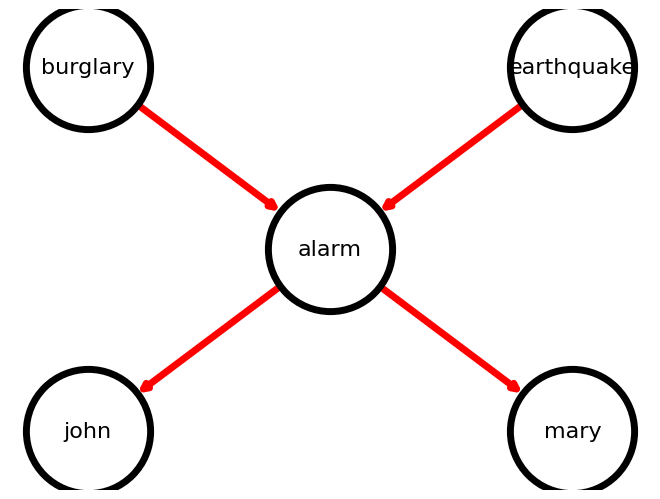

In [ ]:
# Generate graph
n, d = bbn.to_nx_graph()
nx.draw(n, with_labels=True, labels=d, pos=pos, **options)
# Update margins and print the graph
ax = plt.gca()
ax.margins(0.10)
plt.axis("off")
plt.show()

Code for finding posterior probability:

In [ ]:
def print_probs():
  for node in join_tree.get_bbn_nodes():
    potential = join_tree.get_bbn_potential(node)
    print("Node:", node)
    print("Values:")
    print(potential)
    print('----------------')

In [ ]:
def evidence(ev, nod, cat, val):
  ev = EvidenceBuilder() \
    .with_node(join_tree.get_bbn_node_by_name(nod)) \
    .with_evidence(cat, val) \
    .build()
  join_tree.set_observation(ev)

In [ ]:
a = int(input("Did alarm go off(1/0): "))
evidence('ev1','alarm','1',a)
b = int(input("Did earthquake happen(1/0): "))
evidence('ev','earthquake','1',b)
c = int(input("Did burglary happen(1/0): "))
evidence('ev3','burglary','1',c)
print_probs()

Did alarm go off(1/0): 1
Did earthquake happen(1/0): 0
Did burglary happen(1/0): 1
Node: 2|alarm|1,0
Values:
2=1|1.00000
2=0|0.00000
----------------
Node: 3|john|No,Yes
Values:
3=No|0.90000
3=Yes|0.10000
----------------
Node: 4|mary|No,Yes
Values:
4=No|0.70000
4=Yes|0.30000
----------------
Node: 1|earthquake|0,1
Values:
1=0|0.00000
1=1|1.00000
----------------
Node: 0|burglary|0,1
Values:
0=0|0.00000
0=1|1.00000
----------------


# Experiment 2

In [ ]:
!pip install hmmlearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.1/161.1 kB 2.3 MB/s eta 0:00:00


In [ ]:
import numpy as np
from hmmlearn import hmm

In [ ]:
n_states = 3
n_observations = 2

In [ ]:
transition_matrix = np.array([
    [0.5, 0.3, 0.2],
    [0.4, 0.2, 0.4],
    [0.0, 0.3, 0.7]
])

In [ ]:
emission_matrix = np.array([
    [0.9, 0.1],
    [0.6, 0.4],
    [0.2, 0.8]
])

In [ ]:
model = hmm.CategoricalHMM(n_components=3, n_features=2, startprob_prior=1.0, transmat_prior=1.0, emissionprob_prior=1.0)
model.transmat_ = transition_matrix
model.emissionprob_ = emission_matrix

**Getting stationary distribution using hmm**

In [ ]:
stationary_distribution = model.get_stationary_distribution()
print(f'Stationary Distribution: {stationary_distribution}')

Stationary Distribution: [0.21818182 0.27272727 0.50909091]


In [ ]:
def stat_dist(A):
  iter = 10000
  A_copy = A[:]
  for i in range(iter):
    A_copy = np.dot(A_copy, A)
  return A_copy

In [ ]:
stat = stat_dist(transition_matrix)
print(stat)

[[0.21818182 0.27272727 0.50909091]
 [0.21818182 0.27272727 0.50909091]
 [0.21818182 0.27272727 0.50909091]]


In [ ]:
stat_dist_arr = stat[0]
print(stat_dist_arr)

[0.21818182 0.27272727 0.50909091]


In [ ]:
#PROB OF P(Y,X)
prob_sunny = stationary_distribution[2]
prob= prob_sunny*emission_matrix[2][1]*transition_matrix[1][2]*emission_matrix[1][1]*transition_matrix[2][1]*emission_matrix[2][0]
print(prob)

0.003909818181818184


**Most Likely Hidden State**

In [ ]:
obs_seq = np.array([[1], [1], [0]]) #given mood sequence

**Viterbi Likelihood**

In [ ]:
def viterbi(obs_seq, trans_mat, em_mat, start_prob):
    n_states = trans_mat.shape[0]
    n_obs = len(obs_seq)
    viterbi = np.zeros((n_obs, n_states))
    backpointer = np.zeros((n_obs, n_states), dtype=int)
    for s in range(n_states):
        viterbi[0, s] = start_prob[s] * em_mat[s, obs_seq[0]]
        backpointer[0, s] = 0
    for t in range(1, n_obs):
        for s in range(n_states):
            max_prob = -1
            max_state = 0
            for s_prev in range(n_states):
                prob = viterbi[t-1, s_prev] * trans_mat[s_prev, s] * em_mat[s, obs_seq[t]]
                if prob > max_prob:
                    max_prob = prob
                    max_state = s_prev
            viterbi[t, s] = max_prob
            backpointer[t, s] = max_state
    best_last_state = np.argmax(viterbi[-1])
    best_seq = [-1] * n_obs
    best_seq[-1] = best_last_state
    for t in range(n_obs-2, -1, -1):
        best_seq[t] = backpointer[t+1, best_seq[t+1]]
    best_seq_prob = viterbi[-1, best_last_state]
    return best_seq, best_seq_prob, viterbi, backpointer

In [ ]:
obs_seq = [1, 1, 0]
state_sequence, max_prob,viterbi_matrix, backpointer_matrix= viterbi(obs_seq, transition_matrix, emission_matrix, stationary_distribution)
print("Most likely hidden state sequence:", state_sequence)
print("Prob: ", max_prob)

Most likely hidden state sequence: [2, 2, 1]
Prob:  0.041053090909090914


**Sequence Likelihood**

**Forward Likelihood**

In [ ]:
def forward_algorithm(obs_seq, trans_mat, em_mat, start_prob):
    n_states = trans_mat.shape[0]
    n_obs = len(obs_seq)
    obs_indices = [0 if mood == 'sad' else 1 for mood in obs_seq]  # Example mapping
    forward = np.zeros((n_obs, n_states))
    for s in range(n_states):
        forward[0, s] = start_prob[s] * em_mat[s, obs_indices[0]]
    for t in range(1, n_obs):
        for s in range(n_states):
            forward[t, s] = np.sum(forward[t-1, :] * trans_mat[:, s] * em_mat[s, obs_indices[t]])
    prob_of_seq = np.sum(forward[-1, :])
    return prob_of_seq

In [ ]:
obs_seq = ['happy', 'sad', 'happy']
likelihood = forward_algorithm(obs_seq, transition_matrix, emission_matrix, stationary_distribution)
print(f"The likelihood of the sequence {obs_seq} is {likelihood:.4f}")

The likelihood of the sequence ['happy', 'sad', 'happy'] is 0.1012


In [ ]:
obs_seq = ['happy', 'happy', 'sad']
likelihood = forward_algorithm(obs_seq, transition_matrix, emission_matrix, stationary_distribution)
print(f"The likelihood of the sequence {obs_seq} is {likelihood:.4f}")

The likelihood of the sequence ['happy', 'happy', 'sad'] is 0.1226


# Experiment 3

In [ ]:
!pip install pgmpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 30.4 MB/s eta 0:00:00


In [ ]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD

In [ ]:
# Defining the network structure
model = BayesianNetwork([("C", "H"), ("P", "H")])

In [ ]:
# Defining the CPDs:
cpd_c = TabularCPD("C", 3, [[0.33], [0.33], [0.33]])
cpd_p = TabularCPD("P", 3, [[0.33], [0.33], [0.33]])
cpd_h = TabularCPD(
    "H",
    3,
    [
        [0, 0, 0, 0, 0.5, 1, 0, 1, 0.5],
        [0.5, 0, 1, 0, 0, 0, 1, 0, 0.5],
        [0.5, 1, 0, 1, 0.5, 0, 0, 0, 0],
    ],
    evidence=["C", "P"],
    evidence_card=[3, 3],
)

In [ ]:
# Associating the CPDs with the network structure.
model.add_cpds(cpd_c, cpd_p, cpd_h)

In [ ]:
# Some other methods
model.get_cpds()

[<TabularCPD representing P(C:3) at 0x7c11a5091300>,
 <TabularCPD representing P(P:3) at 0x7c11a50932b0>,
 <TabularCPD representing P(H:3 | C:3, P:3) at 0x7c11a5092140>]

In [ ]:
model.check_model()

True

In [ ]:
from pgmpy.inference import VariableElimination

In [ ]:
infer = VariableElimination(model)
posterior_p = infer.query(["P"], evidence={"C": 0, "H": 2})
print(posterior_p)

+------+----------+
| P    |   phi(P) |
+======+==========+
| P(0) |   0.3333 |
+------+----------+
| P(1) |   0.6667 |
+------+----------+
| P(2) |   0.0000 |
+------+----------+


In [ ]:
infer = VariableElimination(model)
posterior_p = infer.query(["P"], evidence={"C": 0, "H": 1})
print(posterior_p)

+------+----------+
| P    |   phi(P) |
+======+==========+
| P(0) |   0.3333 |
+------+----------+
| P(1) |   0.0000 |
+------+----------+
| P(2) |   0.6667 |
+------+----------+


# Experiment 4

**Classwork**

In [ ]:
!pip install pymc3 --upgrade

In [ ]:
import pymc3 as pm
import numpy as np

In [ ]:
# Define the model in a single context
with pm.Model() as model:
    # Define nodes within the model context
    T = pm.Normal('Temperature', mu=20, sigma=5)
    S = pm.Normal('Ice Cream Sales', mu=50, sigma=10)
    # Define Linear relationship
    S_obs = pm.Deterministic('S_obs', 2 * T + 10)

In [ ]:
# Run inference using the defined model
with model:
  trace = pm.sample(1000)

/usr/local/lib/python3.10/dist-packages/deprecat/classic.py:232: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)


In [ ]:
# Question 1: Expected Ice Cream Sales on a 25 degree celcius day?
T_value = 25
expected_sales = 2 * T_value + 10
print("Expected Ice Cream Sales:", expected_sales)

Expected Ice Cream Sales: 60


In [ ]:
# Question 2: Increase in Ice Cream Sales if Temperature rises by 2 degree celcius?
T_increase = 2
S_increase = 2 * T_increase
print("Increase in Ice Cream Sales:", S_increase)

Increase in Ice Cream Sales: 4


**Homework**

In [ ]:
!pip install pgmpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 4.6 MB/s eta 0:00:00
  Using cached numpy-2.1.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 50.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 21.3 MB/s eta 0:00:00
Using cached numpy-2.1.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.1
    Uninstalling numpy-1.22.1:
      Successfully uninstalled numpy-1.22.1
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.6.1 requires numpy<2.0a0,>=1.23, but you have numpy 2.1.2 which is incompatible.

In [ ]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD

In [ ]:
# Defining the network structure
model = BayesianNetwork([("D", "G"), ("I", "G"), ("G", "L"), ("I", "S")])

In [ ]:
# Defining the CPDs:
cpd_d = TabularCPD("D", 2, [[0.6], [0.4]])
cpd_i = TabularCPD("I", 2, [[0.7], [0.3]])

In [ ]:
cpd_g = TabularCPD("G", 3, [[0.3,0.05,0.9,0.5], [0.4,0.25,0.08,0.3], [0.3,0.7,0.02,0.2],], evidence=["D", "I"], evidence_card=[2, 2])

In [ ]:
cpd_l = TabularCPD("L", 2, [[0.1,0.4,0.99], [0.9,0.6,0.01],], evidence=["G"], evidence_card=[3])

In [ ]:
cpd_s = TabularCPD("S", 2, [[0.95,0.2], [0.05,0.8],], evidence=["I"], evidence_card=[2])

In [ ]:
# Associating the CPDs with the network structure
model.add_cpds(cpd_d, cpd_i, cpd_g, cpd_l, cpd_s)

In [ ]:
# Some other methods
model.get_cpds()

[<TabularCPD representing P(D:2) at 0x799a499ec610>,
 <TabularCPD representing P(I:2) at 0x799a499ef250>,
 <TabularCPD representing P(G:3 | D:2, I:2) at 0x799a499ef1f0>,
 <TabularCPD representing P(L:2 | G:3) at 0x799a499efee0>,
 <TabularCPD representing P(S:2 | I:2) at 0x799a499ec760>]

In [ ]:
# Initializing the VariableElimination class
from pgmpy.inference import VariableElimination
model1 = VariableElimination(model)

In [ ]:
# Computing the probability of intelligence given letter=0.
q = model1.query(variables=["I"], evidence={"L": 0})
print(q)

+------+----------+
| I    |   phi(I) |
+======+==========+
| I(0) |   0.5653 |
+------+----------+
| I(1) |   0.4347 |
+------+----------+


# Experiment 5

In [ ]:
!pip install --upgrade pgmpy

In [ ]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD

In [ ]:
# Defining the network structure
model = BayesianNetwork([("B","A"),("E","A"),("A","J"),("A","M")])

In [ ]:
# Defining the CPDs:
cpd_b = TabularCPD("B", 2, [[0.999], [0.001]])
cpd_e = TabularCPD("E", 2, [[0.998], [0.002]])
cpd_a = TabularCPD("A", 2, [[0.999,0.71,0.06,0.05], [0.001,0.29,0.94,0.95]], evidence=["B","E"], evidence_card=[2,2])
cpd_j = TabularCPD("J", 2, [[0.95,0.10],[0.05,0.90]], evidence=["A"], evidence_card=[2])
cpd_m = TabularCPD("M", 2, [[0.99,0.30],[0.01,0.70]], evidence=["A"], evidence_card=[2])

In [ ]:
# Associating the CPDs with the network structure.
model.add_cpds(cpd_b, cpd_e, cpd_a, cpd_j, cpd_m)

In [ ]:
# Some other methods
model.get_cpds()

[<TabularCPD representing P(B:2) at 0x797239222860>,
 <TabularCPD representing P(E:2) at 0x797239220c40>,
 <TabularCPD representing P(A:2 | B:2, E:2) at 0x7972392233d0>,
 <TabularCPD representing P(J:2 | A:2) at 0x7972392226b0>,
 <TabularCPD representing P(M:2 | A:2) at 0x7972392228c0>]

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

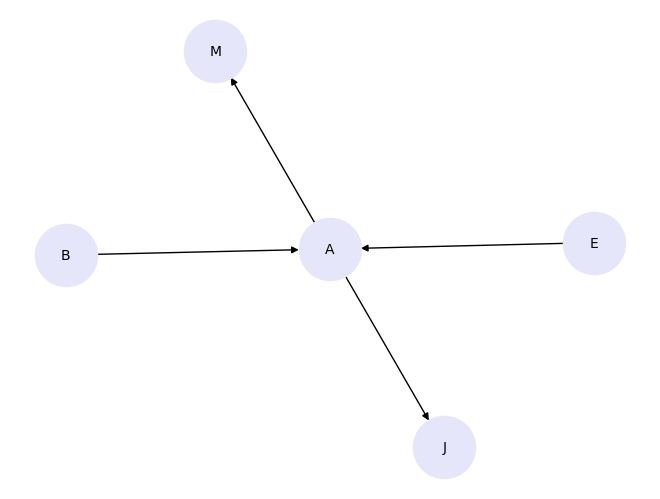

In [ ]:
# Convert BayesianNetwork to a simple directed graph
graph = nx.DiGraph(model.edges())
# Draw the graph without custom styling options to avoid errors
nx.draw(graph, with_labels=True, node_size=2000, node_color="lavender", font_size=10)
plt.show()

In [ ]:
print(cpd_b)
print(cpd_e)
print(cpd_a)
print(cpd_j)
print(cpd_m)

+------+-------+
| B(0) | 0.999 |
+------+-------+
| B(1) | 0.001 |
+------+-------+
+------+-------+
| E(0) | 0.998 |
+------+-------+
| E(1) | 0.002 |
+------+-------+
+------+-------+------+------+------+
| B    | B(0)  | B(0) | B(1) | B(1) |
+------+-------+------+------+------+
| E    | E(0)  | E(1) | E(0) | E(1) |
+------+-------+------+------+------+
| A(0) | 0.999 | 0.71 | 0.06 | 0.05 |
+------+-------+------+------+------+
| A(1) | 0.001 | 0.29 | 0.94 | 0.95 |
+------+-------+------+------+------+
+------+------+------+
| A    | A(0) | A(1) |
+------+------+------+
| J(0) | 0.95 | 0.1  |
+------+------+------+
| J(1) | 0.05 | 0.9  |
+------+------+------+
+------+------+------+
| A    | A(0) | A(1) |
+------+------+------+
| M(0) | 0.99 | 0.3  |
+------+------+------+
| M(1) | 0.01 | 0.7  |
+------+------+------+


In [ ]:
from pgmpy.inference import VariableElimination

In [ ]:
infer = VariableElimination(model)

In [ ]:
q = infer.query(["M"],{"B":1})
print(q)

+------+----------+
| M    |   phi(M) |
+======+==========+
| M(0) |   0.3414 |
+------+----------+
| M(1) |   0.6586 |
+------+----------+


In [ ]:
q = infer.query(["J"],{"M":1})
print(q)

+------+----------+
| J    |   phi(J) |
+======+==========+
| J(0) |   0.8224 |
+------+----------+
| J(1) |   0.1776 |
+------+----------+
